<a href="https://colab.research.google.com/github/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/CKME_136_Analysis_of_the_National_Hockey_League_Roles_and_Lines_(FINAL_SUBMISSION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of National Hockey League Roles and Lines

By Ray Hu

# Importing Libraries

Importing libraries for later use

In [2]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Mounting personal Google Drive 

This will allow for easier access when saving files or csvs

In [3]:
# Mounting Google Drive for access to datasets

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#  Change working directory to Google Drive then Output Present Working Directory

%cd /content/drive/My Drive/CKME 136 - CAPSTONE PROJECT

!pwd

/content/drive/My Drive/CKME 136 - CAPSTONE PROJECT
/content/drive/My Drive/CKME 136 - CAPSTONE PROJECT


# Reading the data sets into Google Colab

There are 12 csv files for skaters ranging from the 2008-2009 to 2019-2020 seasons.

In [5]:
# Importing NHL data sets from Github

# Skaters data set from the 2008-2009 season through to the 2019-2020 season

urlskaters2008 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202008.csv?raw=true'
skaters2008 = pd.read_csv(urlskaters2008)

urlskaters2009 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202009.csv?raw=true'
skaters2009 = pd.read_csv(urlskaters2009)

urlskaters2010 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202010.csv?raw=true'
skaters2010 = pd.read_csv(urlskaters2010)

urlskaters2011 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202011.csv?raw=true'
skaters2011 = pd.read_csv(urlskaters2011)

urlskaters2012 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202012.csv?raw=true'
skaters2012 = pd.read_csv(urlskaters2012)

urlskaters2013 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202013.csv?raw=true'
skaters2013 = pd.read_csv(urlskaters2013)

urlskaters2014 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202014.csv?raw=true'
skaters2014 = pd.read_csv(urlskaters2014)

urlskaters2015 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202015.csv?raw=true'
skaters2015 = pd.read_csv(urlskaters2015)

urlskaters2016 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202016.csv?raw=true'
skaters2016 = pd.read_csv(urlskaters2016)

urlskaters2017 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202017.csv?raw=true'
skaters2017 = pd.read_csv(urlskaters2017)

urlskaters2018 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202018.csv?raw=true'
skaters2018 = pd.read_csv(urlskaters2018)

urlskaters2019 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202019.csv?raw=true'
skaters2019 = pd.read_csv(urlskaters2019)

# Exploratory Analysis

Let's view the general layout of the data set for skaters in the 2008 to 2009 season. 

Note that each player is given a unique 'playerId' which can later be used as a unique key to join the 'skater' and 'lines' data sets together.

The data set contains over 150 features or columns.

Records for all hockey players are broken down into different 'situations' but also summed up in the 'all' situation. For our purposes, we will be only looking at stats derived from the 'all' situation.

In [6]:
# Show the 'skaters' 2008-2009 season data set

skaters2008

playerId  season  ... fenwickForAfterShifts fenwickAgainstAfterShifts
0      8462196    2008  ...                   3.0                       0.0
1      8462196    2008  ...                   0.0                       0.0
2      8462196    2008  ...                  74.0                       8.0
3      8462196    2008  ...                   3.0                       0.0
4      8462196    2008  ...                   6.0                       0.0
...        ...     ...  ...                   ...                       ...
4420   8470622    2008  ...                   0.0                       0.0
4421   8470622    2008  ...                   0.0                       0.0
4422   8470622    2008  ...                  33.0                      25.0
4423   8470622    2008  ...                   1.0                       1.0
4424   8470622    2008  ...                   0.0                       0.0

[4425 rows x 154 columns]

We can view more indepth information from both data sets.

In [7]:
# View the statistical summary of the skaters 2008 and 2009 season

skaters2008.describe()

playerId  season  ...  fenwickForAfterShifts  fenwickAgainstAfterShifts
count  4.425000e+03  4425.0  ...            4425.000000                4425.000000
mean   8.468231e+06  2008.0  ...               6.295593                   3.770621
std    5.111543e+03     0.0  ...              16.917958                   8.774967
min    8.445550e+06  2008.0  ...               0.000000                   0.000000
25%    8.467336e+06  2008.0  ...               0.000000                   0.000000
50%    8.469770e+06  2008.0  ...               0.000000                   0.000000
75%    8.471299e+06  2008.0  ...               3.000000                   2.000000
max    8.475115e+06  2008.0  ...             138.000000                  62.000000

[8 rows x 150 columns]

# Data Clean Up

The first objective of feature selection will be to filter out the other situations. By doing so, we are left with the cumulative records found in 'all' situations. 

Secondly, for this study we will only be focusing on the players that consist of the Forwards lineup. We want to focus on features that are often associated with player performance.

The statistic that help define a skillful player whose role it is to make plays or score is points. Points are awarded to players who score goals and who assisted with goals too:
*   I_F_points

Enforcers are those players that often thought of as players that bring more physicality into the game. This in turn means more hits and penalties. Enforcers are usually the bigger players and are often fulfilling the role as defense-like forward. A key responsibility of some players is to attempt to block opposing players from shooting on their goal.

The statistics that help define an enforcer-like player:
*   I_F_hits
*   penalties
*   shotsBlockedByPlayer



## Feature Selection for Skaters

First we keep only the records for when the situation is ALL and only the records for Forward players.

Afterwards we filter these records for only the features of interest.

In [8]:
# Keep only the rows (or records) that contain all situations of play and only for Forwards

sk2008 = skaters2008[(skaters2008.situation == 'all') & (skaters2008.games_played > 40) & (skaters2008.position.str.contains('L|C|R'))]
sk2009 = skaters2009[(skaters2009.situation == 'all') & (skaters2009.games_played > 40) & (skaters2009.position.str.contains('L|C|R'))]
sk2010 = skaters2010[(skaters2010.situation == 'all') & (skaters2010.games_played > 40) & (skaters2010.position.str.contains('L|C|R'))]
sk2011 = skaters2011[(skaters2011.situation == 'all') & (skaters2011.games_played > 40) & (skaters2011.position.str.contains('L|C|R'))]
sk2012 = skaters2012[(skaters2012.situation == 'all') & (skaters2012.games_played > 40) & (skaters2012.position.str.contains('L|C|R'))]
sk2013 = skaters2013[(skaters2013.situation == 'all') & (skaters2013.games_played > 40) & (skaters2013.position.str.contains('L|C|R'))]
sk2014 = skaters2014[(skaters2014.situation == 'all') & (skaters2014.games_played > 40) & (skaters2014.position.str.contains('L|C|R'))]
sk2015 = skaters2015[(skaters2015.situation == 'all') & (skaters2015.games_played > 40) & (skaters2015.position.str.contains('L|C|R'))]
sk2016 = skaters2016[(skaters2016.situation == 'all') & (skaters2016.games_played > 40) & (skaters2016.position.str.contains('L|C|R'))]
sk2017 = skaters2017[(skaters2017.situation == 'all') & (skaters2017.games_played > 40) & (skaters2017.position.str.contains('L|C|R'))]
sk2018 = skaters2018[(skaters2018.situation == 'all') & (skaters2018.games_played > 40) & (skaters2018.position.str.contains('L|C|R'))]
sk2019 = skaters2019[(skaters2019.situation == 'all') & (skaters2019.games_played > 40) & (skaters2019.position.str.contains('L|C|R'))]

In [9]:
sk2019

playerId  season  ... fenwickForAfterShifts fenwickAgainstAfterShifts
1      8475169    2019  ...                   0.0                       0.0
11     8470144    2019  ...                   0.0                       0.0
21     8479318    2019  ...                   0.0                       0.0
41     8478498    2019  ...                   0.0                       0.0
71     8475848    2019  ...                   0.0                       0.0
...        ...     ...  ...                   ...                       ...
4381   8479316    2019  ...                   0.0                       0.0
4391   8475726    2019  ...                   0.0                       0.0
4396   8476913    2019  ...                   0.0                       0.0
4406   8477934    2019  ...                   0.0                       0.0
4411   8477922    2019  ...                   0.0                       0.0

[363 rows x 154 columns]

In [10]:
# Feature selection

skaters2008_filtered = sk2008.loc[:, ['playerId',
                                           'name',
                                           'games_played',
                                           'icetime',
                                           'I_F_points',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2009_filtered = sk2009.loc[:, ['playerId',
                                           'name',
                                           'games_played',
                                           'icetime',
                                           'I_F_points',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2010_filtered = sk2010.loc[:, ['playerId',
                                           'name',
                                           'games_played',
                                           'icetime',
                                           'I_F_points',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2011_filtered = sk2011.loc[:, ['playerId',
                                           'name',
                                           'games_played',
                                           'icetime',
                                           'I_F_points',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2012_filtered = sk2012.loc[:, ['playerId',
                                           'name',
                                           'games_played',
                                           'icetime',
                                           'I_F_points',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2013_filtered = sk2013.loc[:, ['playerId',
                                           'name',
                                           'games_played',
                                           'icetime',
                                           'I_F_points',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2014_filtered = sk2014.loc[:, ['playerId',
                                           'name',
                                           'games_played',
                                           'icetime',
                                           'I_F_points',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2015_filtered = sk2015.loc[:, ['playerId',
                                           'name',
                                           'games_played',
                                           'icetime',
                                           'I_F_points',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2016_filtered = sk2016.loc[:, ['playerId',
                                           'name',
                                           'games_played',
                                           'icetime',
                                           'I_F_points',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2017_filtered = sk2017.loc[:, ['playerId',
                                           'name',
                                           'games_played',
                                           'icetime',
                                           'I_F_points',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2018_filtered = sk2018.loc[:, ['playerId',
                                           'name',
                                           'games_played',
                                           'icetime',
                                           'I_F_points',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2019_filtered = sk2019.loc[:, ['playerId',
                                           'name',
                                           'games_played',
                                           'icetime',
                                           'I_F_points',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

## Standardizing the Features

In order to be able to compare between players, their stats need to be standardized as most of their stats are seasonal totals but do not reflect the amount of game minutes played to reach those totals.

The ice time is originally recorded in seconds but we convert that into minutes and then standardize all other stats by a per ice time minute measurement.

We can view the 2019-2020 season for skaters data set after we have finished converting and standardizing the values.

In [11]:
# View the 2019 to 2020 season skaters data set after it's been filtered for only the features of interest

skaters2019_filtered

playerId               name  ...  penalties  shotsBlockedByPlayer
1      8475169       Evander Kane  ...       34.0                  24.0
11     8470144      Frans Nielsen  ...        4.0                  35.0
21     8479318    Auston Matthews  ...        4.0                  60.0
41     8478498       Jake DeBrusk  ...        7.0                  15.0
71     8475848  Brendan Gallagher  ...       13.0                  29.0
...        ...                ...  ...        ...                   ...
4381   8479316         Luke Kunin  ...       17.0                  54.0
4391   8475726      Tyler Toffoli  ...       10.0                  15.0
4396   8476913        Devin Shore  ...        4.0                  14.0
4406   8477934     Leon Draisaitl  ...        9.0                  19.0
4411   8477922    Melker Karlsson  ...       10.0                  39.0

[363 rows x 8 columns]

Finally lets merge all the seasonal data for skaters into one singular dataframe that we named 'skaters'

In [12]:
# Merge all skater data sets into a dataframe named 'skaters'

skaters = pd.concat([skaters2008_filtered, 
                     skaters2009_filtered, 
                     skaters2010_filtered, 
                     skaters2011_filtered, 
                     skaters2012_filtered, 
                     skaters2013_filtered, 
                     skaters2014_filtered, 
                     skaters2015_filtered, 
                     skaters2016_filtered, 
                     skaters2017_filtered, 
                     skaters2018_filtered, 
                     skaters2019_filtered]).groupby(['playerId', 'name']).sum().reset_index()

In [13]:
# Create new column 'Ice_Time_(mins)_Per_Game'

skaters['Ice_Time_(mins)'] = skaters['icetime'] / 60
skaters['Ice_Time_(mins)_Per_Game'] = skaters['Ice_Time_(mins)'] / skaters['games_played']
skaters['Points_Per_Min'] = skaters['I_F_points'] / skaters['Ice_Time_(mins)']
skaters['Hits_Per_Min'] = skaters['I_F_hits'] / skaters['Ice_Time_(mins)']
skaters['Penalties_Per_Min'] = skaters['penalties'] / skaters['Ice_Time_(mins)']
skaters['Shots_Blocked_Per_Min'] = skaters['shotsBlockedByPlayer'] / skaters['Ice_Time_(mins)']

In [14]:
# Show the new merged data frame 'skaters'

skaters

playerId             name  ...  Penalties_Per_Min  Shots_Blocked_Per_Min
0     8445735  Rod Brind'Amour  ...           0.014312               0.026239
1     8446485      Kris Draper  ...           0.016948               0.021186
2     8446788   Sergei Fedorov  ...           0.029114               0.029114
3     8447958      Bobby Holik  ...           0.052241               0.009498
4     8448208     Jaromir Jagr  ...           0.016176               0.008479
..        ...              ...  ...                ...                    ...
961   8481481    Blake Lizotte  ...           0.011022               0.024248
962   8481523       Kirby Dach  ...           0.013137               0.025179
963   8481554      Kaapo Kakko  ...           0.007437               0.011687
964   8481559      Jack Hughes  ...           0.005168               0.021705
965   8481813      Gaetan Haas  ...           0.005370               0.050121

[966 rows x 14 columns]

We can now create a dataframe 'skatersdf' that contains only the playerId, name, and standardized features.

In [15]:
skatersdf = skaters.iloc[: , [0,1,9,10,11,12,13]]

In [16]:
skatersdf

playerId             name  ...  Penalties_Per_Min  Shots_Blocked_Per_Min
0     8445735  Rod Brind'Amour  ...           0.014312               0.026239
1     8446485      Kris Draper  ...           0.016948               0.021186
2     8446788   Sergei Fedorov  ...           0.029114               0.029114
3     8447958      Bobby Holik  ...           0.052241               0.009498
4     8448208     Jaromir Jagr  ...           0.016176               0.008479
..        ...              ...  ...                ...                    ...
961   8481481    Blake Lizotte  ...           0.011022               0.024248
962   8481523       Kirby Dach  ...           0.013137               0.025179
963   8481554      Kaapo Kakko  ...           0.007437               0.011687
964   8481559      Jack Hughes  ...           0.005168               0.021705
965   8481813      Gaetan Haas  ...           0.005370               0.050121

[966 rows x 7 columns]

## Check for Missing Values

We check any missing values.

Fortunately the data set provided by moneypuck.com does not contain any missing values.

In [17]:
# Check data set for missing values

skatersdf.isnull().values.any()

False

## Data Preprocessing

Make a copy of 'skaters' dataframe but exclude the columns for 'playerId' and 'name' because they are categorical.

Exclude 'Ice_Time_(mins)' because player careers span different lengths and the total career ice time would not be useful for analysis.

In [18]:
# Create a dataframe with only the standardized features

skaters_st = skatersdf.iloc[: , 2:]

skaters_st

Ice_Time_(mins)_Per_Game  ...  Shots_Blocked_Per_Min
0                   15.819916  ...               0.026239
1                   11.456796  ...               0.021186
2                   16.513462  ...               0.029114
3                   10.188441  ...               0.009498
4                   17.541533  ...               0.008479
..                        ...  ...                    ...
961                 13.958205  ...               0.024248
962                 14.272656  ...               0.025179
963                 14.261111  ...               0.011687
964                 15.860656  ...               0.021705
965                  9.631897  ...               0.050121

[966 rows x 5 columns]

# Data Visualization



## Correlation Heatmap

Lets run a correlation test to see if there are any features that we picked that are overly correlated with each other.

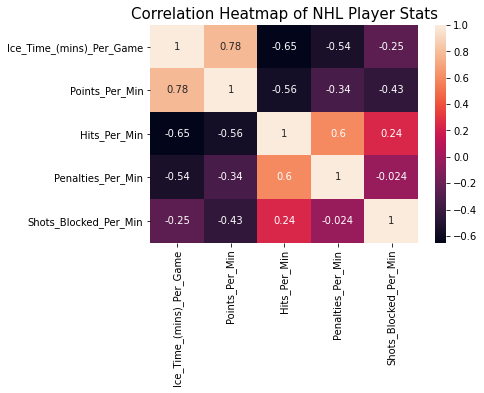

In [19]:
# Correlation matrix is performed to see if there are any of the selected features that are highly correlated

corr = skaters_st.corr(method ='pearson') 

sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap of NHL Player Stats',fontsize=15)
# plt.savefig('Correlation Heatmap of NHL Player Stats')
plt.show()

## Boxplot

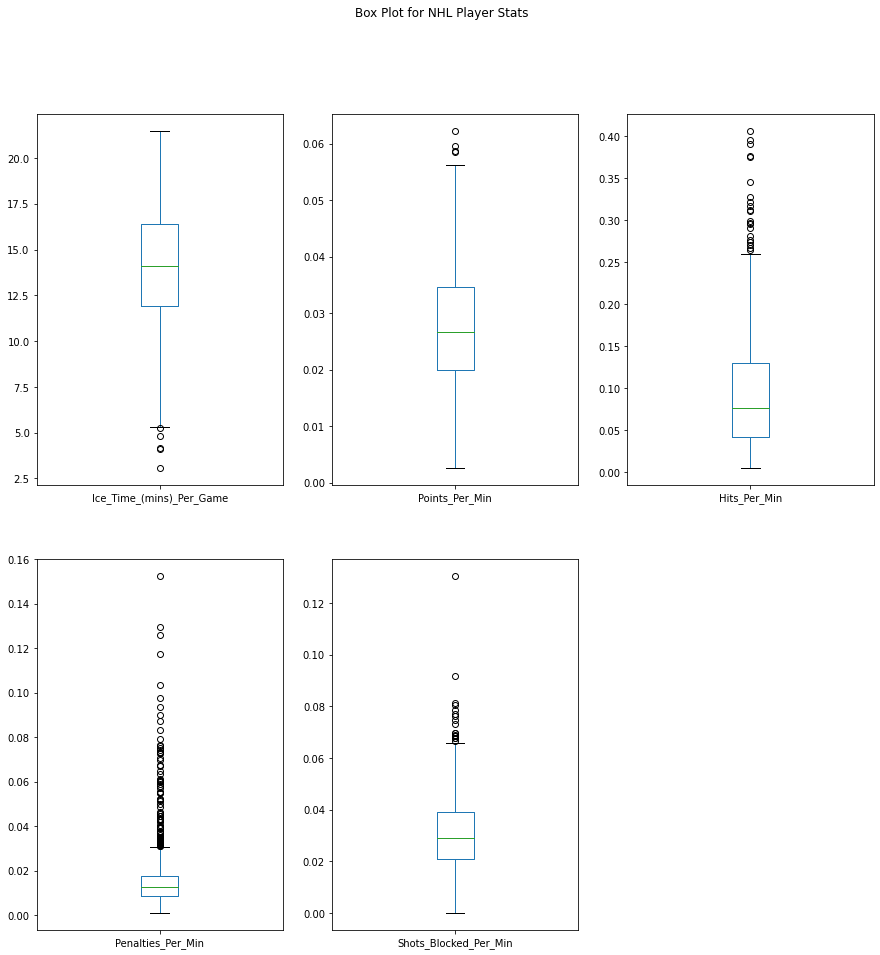

In [20]:
# Boxplots

skaters_st.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(15,15),
                                        title='Box Plot for NHL Player Stats')
# plt.savefig('Box Plots of NHL Player Stats')
plt.show()

## Histogram distribution

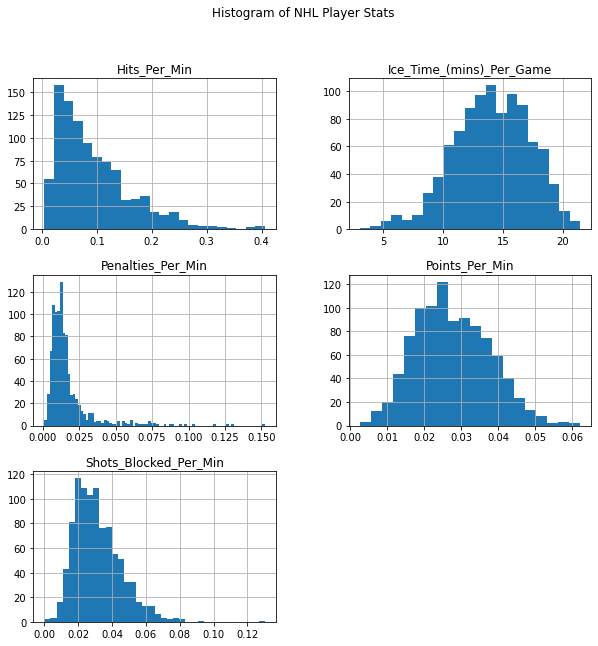

In [21]:
# Distribution

import pylab as pl
skaters_st.hist(bins='auto', figsize=(10,10))
pl.suptitle("Histogram of NHL Player Stats")
# plt.savefig('Histogram of NHL Player Stats')
plt.show()

# KMeans


In an effort to reduce the effect of large values being over represented in our clusters, we transform the values in our data set by scaling the columns. 

In [22]:
scaler = MinMaxScaler()

In [23]:
skaters_sc = pd.DataFrame(scaler.fit_transform(skaters_st), columns=skaters_st.columns)

In [24]:
skaters_sc

Ice_Time_(mins)_Per_Game  ...  Shots_Blocked_Per_Min
0                    0.693863  ...               0.201236
1                    0.456768  ...               0.162481
2                    0.731551  ...               0.223286
3                    0.387845  ...               0.072848
4                    0.787417  ...               0.065032
..                        ...  ...                    ...
961                  0.592696  ...               0.185970
962                  0.609784  ...               0.193111
963                  0.609157  ...               0.089631
964                  0.696077  ...               0.166469
965                  0.357602  ...               0.384399

[966 rows x 5 columns]

## Elbow Method in Determing the Optimal Number of Clusters

Applying the Elbow Method, the recommended number of clusters appears to be 3.

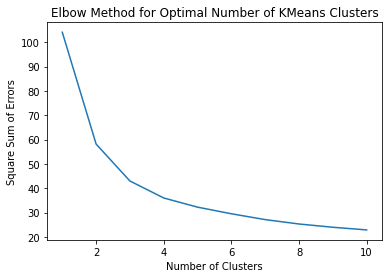

In [25]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(skaters_sc)
    kmeans.fit(skaters_sc)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow Method for Optimal Number of KMeans Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Square Sum of Errors')
# plt.savefig('Elbow Method for KMeans Clusters')
plt.show()

## Applying KMeans Clustering

In [26]:
kmeans3 = KMeans(n_clusters=3)

In [27]:
y_kmeans3 = kmeans3.fit(skaters_sc)

In [28]:
# Find which cluster each data-point belongs to
clusters = kmeans3.predict(skaters_sc)

In [29]:
skaters_cl = skaters_sc

In [31]:
# Add the Cluster column to our dataframe which contained playerId and name: skatersdf
skatersdf_cl = skatersdf

skatersdf_cl['Cluster'] = clusters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
# Add the Cluster column to our scaled dataframe: skaters_sc
skaters_cl['Cluster'] = clusters

In [33]:
# Add the Cluster column to our non-scaled dataframe: skaters_st

skaters_stcl = skaters_st

skaters_stcl['Cluster'] = clusters

KMeans Clustering has resulted in the following 3 clusters.

**Cluster 0: Scorers**
* Highest stats for Ice Time and Points
* Lowest stats for Hits, Penalties, and Shots Blocked

**Cluster 1: Grinders**
* Highest stats for Shots Blocked
* Average stats for Ice Time, Points, Hits

**Cluster 2: Enforcers**
* Highest stats for Hits and Penalties
* Lowest stats for Ice Time, Points
* Just slightly lower than Grinders when it comes to Shots Blocked

Grinders are typically players required to fill out the roster and relieve other players. Hockey is a highly intensive sport and most players only remain on the ice for less than a minute before having to switch off.

In [34]:
# Clusters based on the scaled Skaters dataframe

KMeansResult = skaters_cl.groupby('Cluster').mean()

KMeansResult.head()

Ice_Time_(mins)_Per_Game  ...  Shots_Blocked_Per_Min
Cluster                            ...                       
0                        0.752896  ...               0.189685
1                        0.331095  ...               0.267747
2                        0.533288  ...               0.277754

[3 rows x 5 columns]

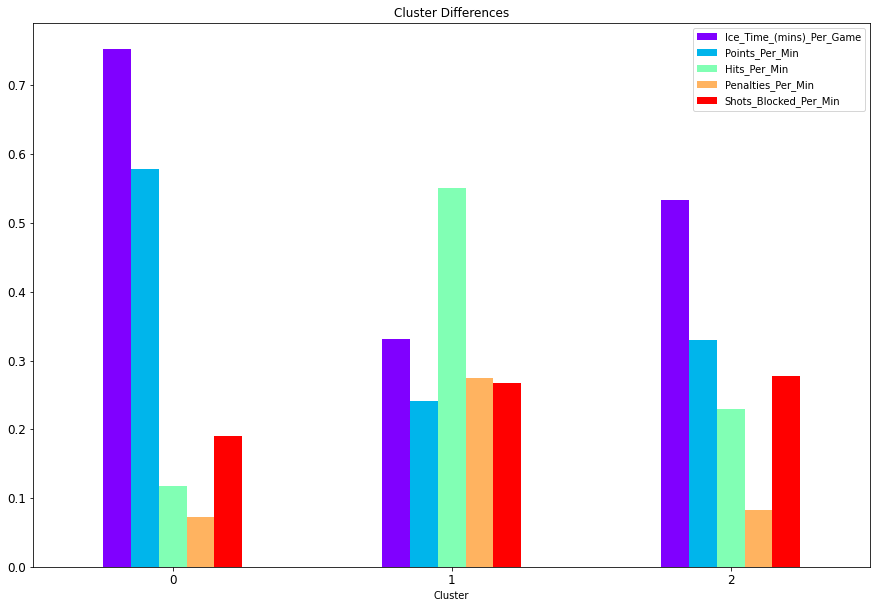

In [35]:
ax = KMeansResult.plot(kind='bar', title ="Cluster Differences", figsize=(15, 10), legend=True, fontsize=12, cmap='rainbow', rot=0)
# plt.savefig('Bar Plot of Kmean Clusters')

In [36]:
# Clusters viewable in the Skaters dataframe with Player IDs and Names

skatersdf_cl

playerId             name  ...  Shots_Blocked_Per_Min  Cluster
0     8445735  Rod Brind'Amour  ...               0.026239        0
1     8446485      Kris Draper  ...               0.021186        2
2     8446788   Sergei Fedorov  ...               0.029114        0
3     8447958      Bobby Holik  ...               0.009498        1
4     8448208     Jaromir Jagr  ...               0.008479        0
..        ...              ...  ...                    ...      ...
961   8481481    Blake Lizotte  ...               0.024248        2
962   8481523       Kirby Dach  ...               0.025179        2
963   8481554      Kaapo Kakko  ...               0.011687        2
964   8481559      Jack Hughes  ...               0.021705        0
965   8481813      Gaetan Haas  ...               0.050121        2

[966 rows x 8 columns]

# Decision Tree Classification

======================================

In [37]:
# Load libraries for Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree

In [38]:
# Split dataset in features and target variable

X = skaters_stcl.drop(['Cluster'], axis=1) # Features
y = skaters_stcl.Cluster # Target variable

In [59]:
# Split dataset into training set (75%) and test set (25%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [48]:
# Decision Tree Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9669421487603306
Precision: 0.967304625199362
Recall: 0.9669421487603306
F1 Score: 0.9669796795066727


In [ ]:
# Confusion Matrix for Decision Tree Classification

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt="d")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.title('Confusion Matrix of Decision Tree Model',fontsize=20)

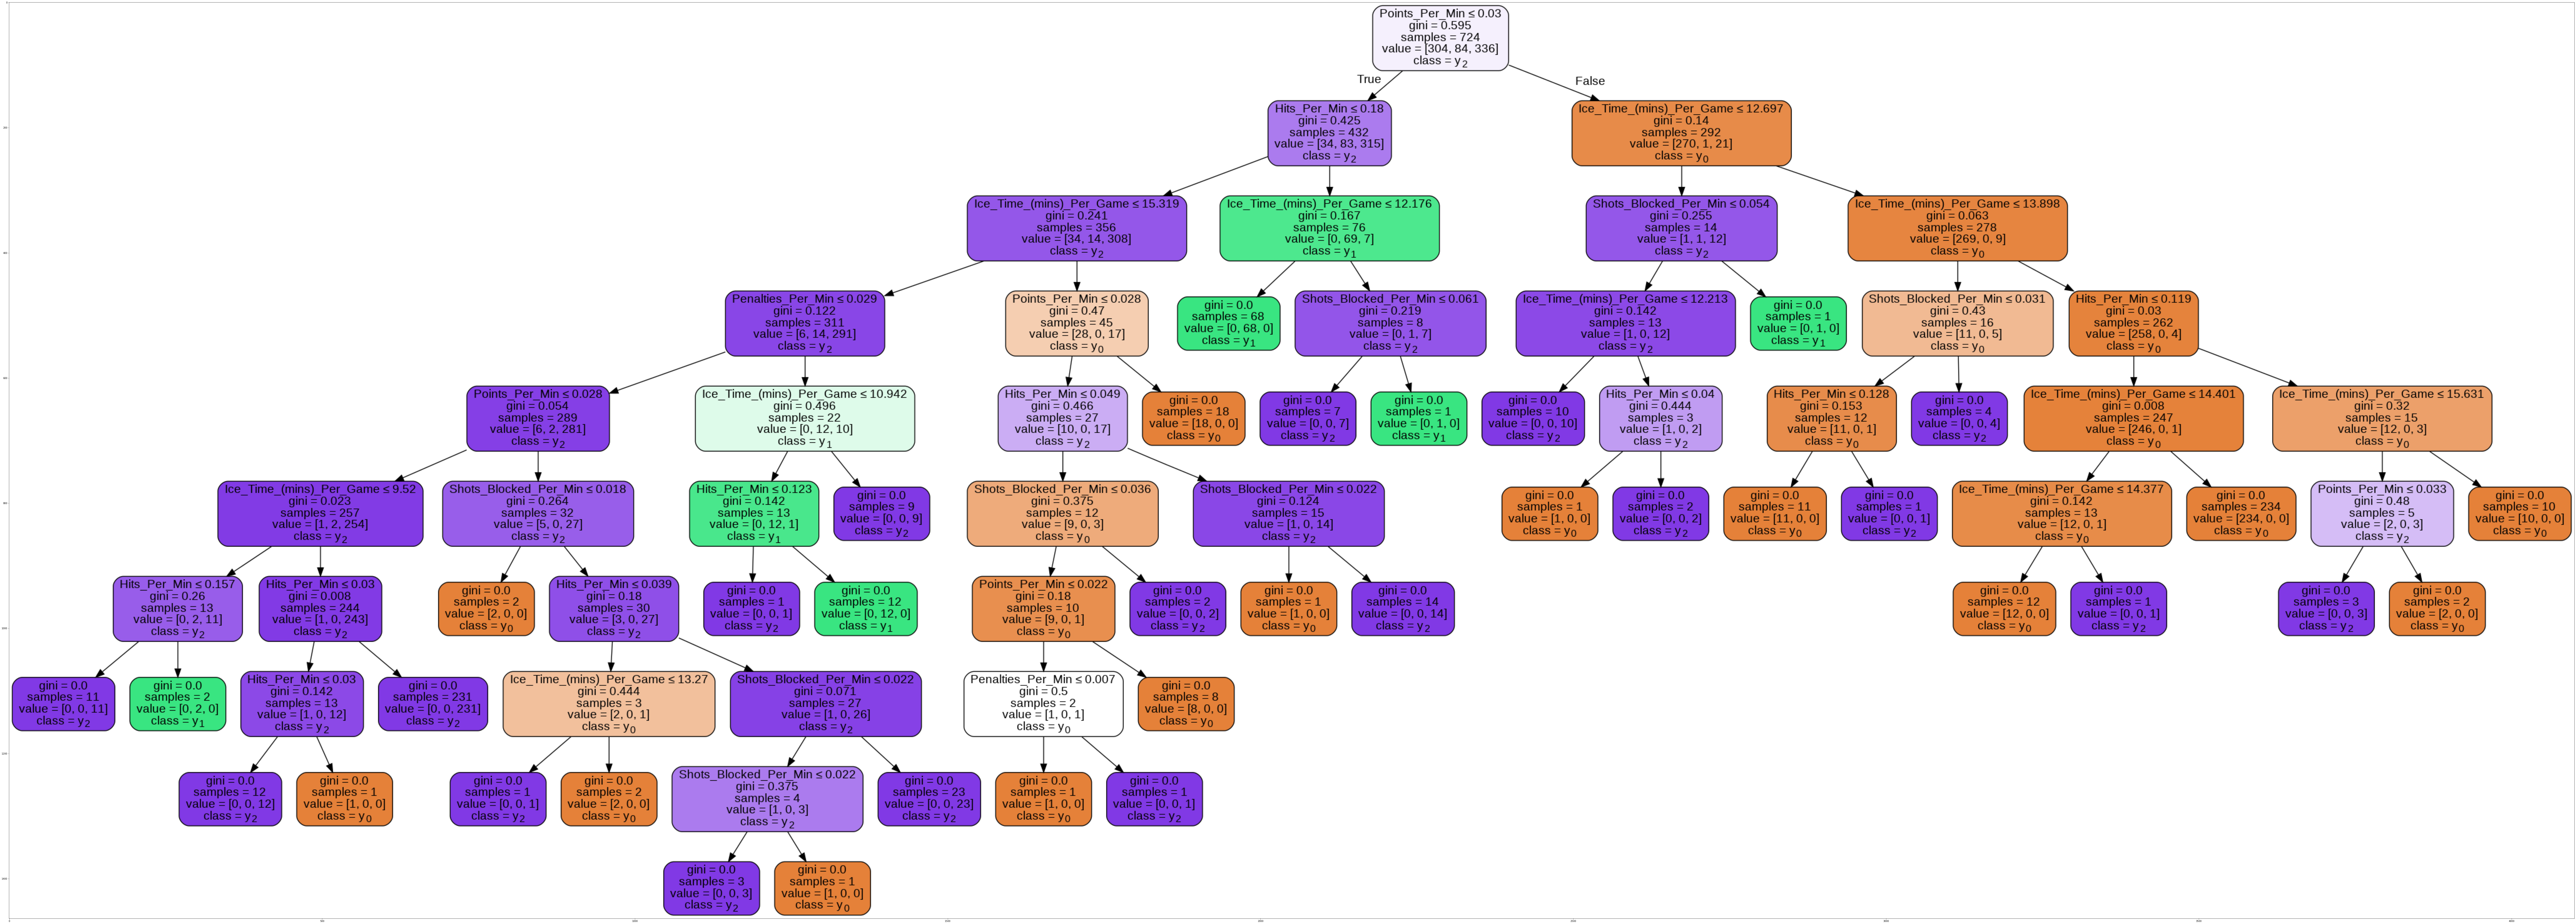

In [44]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io

feature_names = skaters_stcl.columns[0:5]

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_names, class_names=True)

filename = 'Decision_Tree_Forward_Types.png'
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(200,200))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

# Random Forest Classification

In [49]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfclf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfclf.fit(X_train,y_train)

rfy_pred=rfclf.predict(X_test)

In [61]:
#Import metrics
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, rfy_pred))

Accuracy: 0.9710743801652892


# Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

GNB = GaussianNB()

GNB.fit(X_train,y_train)
print(GNB)

NBy_pred = GNB.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, NBy_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy: 0.9504132231404959


# Results

From our three classification models, the model that had the best accuracy was found to be the Random Forest classification with an accuracy of 97.1%.

